# MNIST ConvNet on AIE-ML

In [ ]:
#
# Copyright (C) 2024, Advanced Micro Devices, Inc. All rights reserved.
# SPDX-License-Identifier: MIT
#
# Author: Mark Rollins

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision
import numpy as np

2024-10-07 15:25:20.407567: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 15:25:20.410318: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 15:25:20.417351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 15:25:20.427742: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 15:25:20.430861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 15:25:20.440521: I tensorflow/core/platform/cpu_feature_gu

## Define Network Model

In [2]:
inputs = keras.Input(shape=(28,28,1),name="input")
x1 = layers.Conv2D(filters=16,kernel_size=3,activation="relu",name="conv2d_w1")(inputs)
x2 = layers.MaxPooling2D(pool_size=2,name="max_pooling2d_w2")(x1)
x3 = layers.Conv2D(filters=64,kernel_size=3,activation="relu",name="conv2d_w3")(x2)
x4 = layers.MaxPooling2D(pool_size=2,name="max_pooling2d_w4")(x3)
x5 = layers.Conv2D(filters=128,kernel_size=3,activation="relu",name="conv2d_w5")(x4)
x6 = layers.Flatten(name="flatten_w6")(x5)
outputs = layers.Dense(10,activation="softmax",name="dense_w7")(x6)
model = keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w1 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_w2 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w3 (Conv2D)              │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_w4 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w5 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_w6 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_w7 (Dense)                │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,826 (370.41 KB)

 Trainable params: 94,826 (370.41 KB)

 Non-trainable params: 0 (0.00 B)

## Import MNIST Images

The hand-written digits originate in the MNIST database distributed with the Keras framework. 
The monochromatic images are 28 x 28 with `uint8` data type. 
The training data set has 60,000 images.
The test data set has 10,000 images.

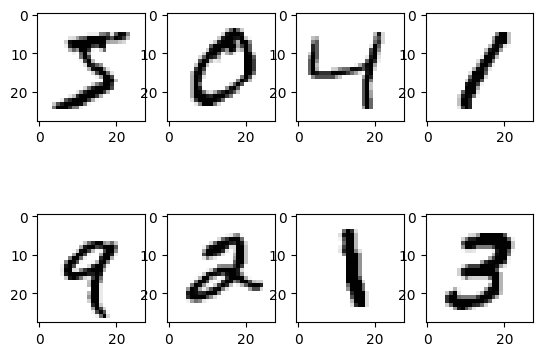

In [4]:
# Set batch size and # of batches
BS=16
NB_trn = 3750
NB_tst = 512
# Load MNIST database:
(trn_images,trn_labels), (tst_images,tst_labels) = mnist.load_data()
trn_images = trn_images.reshape((60000,28,28,1))
trn_images = trn_images[:NB_trn*BS,:,:,:]
tst_images = tst_images.reshape((10000,28,28,1))
# Extract usable data:
tst_images = tst_images[:NB_tst*BS,:,:,:]
trn_labels = trn_labels[:NB_trn*BS]
tst_labels = tst_labels[:NB_tst*BS]
fig,ax = plt.subplots(nrows=2,ncols=4)
for rr in range(2):
    for cc in range(4):
        ax[rr,cc].imshow(trn_images[4*rr+cc],cmap=plt.cm.binary)

## Convert Image Data
Image input data is converted from `uint8` to `float32` for network training. 

In [5]:
trn_images = trn_images.astype("float32") / 255
tst_images = tst_images.astype("float32") / 255

## Train the ConvNet Model

In [6]:
hist = model.fit(trn_images,trn_labels,epochs=5,batch_size=BS)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9166 - loss: 0.2682
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9863 - loss: 0.0432
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9912 - loss: 0.0289
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9929 - loss: 0.0236
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9943 - loss: 0.0194


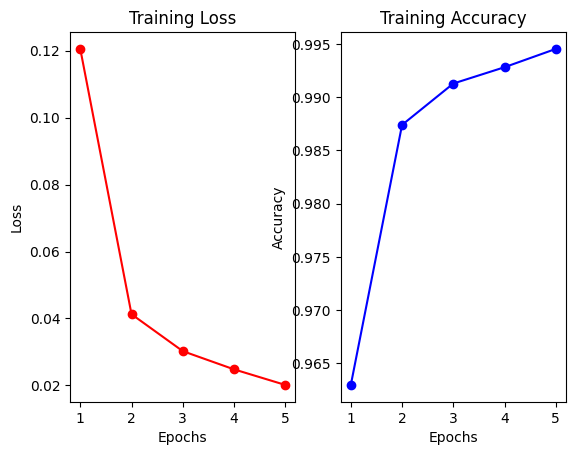

In [7]:
hist_dict = hist.history
hist_dict.keys()
loss_val = hist_dict["loss"]
acc_val = hist_dict["accuracy"]
epochs = range(1,len(loss_val)+1)
fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].plot(epochs,loss_val,"ro-",label="Training Loss")
ax[1].plot(epochs,acc_val,"bo-",label="Training Accuracy")
ax[0].set(xlabel="Epochs",ylabel="Loss",title="Training Loss")
ax[1].set(xlabel="Epochs",ylabel="Accuracy",title="Training Accuracy")
plt.show()

## Evaluate The ConvNet on Test Data

In [8]:
test_loss, test_acc = model.evaluate(tst_images,tst_labels,batch_size=BS)
print(f"Test accuracy: {test_acc:.3f}")

512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9899 - loss: 0.0398
Test accuracy: 0.992


## Predict Test Data

512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


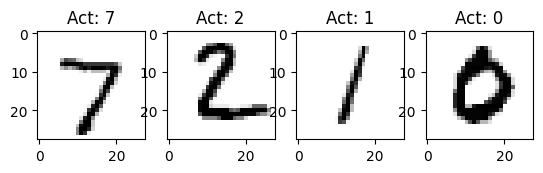

In [9]:
predict = model.predict(tst_images,batch_size=BS)
predict[0]
fig,ax = plt.subplots(nrows=1,ncols=4)
for ii in range(4):
    idx = np.argmax(predict[ii])
    ax[ii].imshow(tst_images[ii],cmap=plt.cm.binary)
    ax[ii].set(title="Act: "+str(idx))

## Extract Taps & Biases

In [10]:
# Get the model weights from each layer:
w1 = model.get_layer(index=1).get_weights()
w3 = model.get_layer(index=3).get_weights()
w5 = model.get_layer(index=5).get_weights()
w7 = model.get_layer(index=7).get_weights()
# Extract taps and bias separately:
w1_taps = w1[0]
w3_taps = w3[0]
w5_taps = w5[0]
w7_taps = w7[0]
w1_bias = w1[1]
w3_bias = w3[1]
w5_bias = w5[1]
w7_bias = w7[1]
# Dump dimensions of taps and bias:
print("w1 taps shape: ",w1_taps.shape, "\t\t# bias: ",len(w1_bias), "\t# params: ",np.prod(w1_taps.shape)+len(w1_bias))
print("w3 taps shape: ",w3_taps.shape, "\t\t# bias: ",len(w3_bias), "\t# params: ",np.prod(w3_taps.shape)+len(w3_bias))
print("w5 taps shape: ",w5_taps.shape, "\t# bias: ",len(w5_bias), "\t# params: ",np.prod(w5_taps.shape)+len(w5_bias))
print("w7 taps shape: ",w7_taps.shape, "\t\t# bias: ",len(w7_bias), "\t# params: ",np.prod(w7_taps.shape)+len(w7_bias))
w_all = model.get_weights()
np.savetxt('aie/conv2d_w1/taps_trained.txt',np.reshape(w_all[0].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/conv2d_w1/bias_trained.txt',np.reshape(w_all[1].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/conv2d_w3/taps_trained.txt',np.reshape(w_all[2].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/conv2d_w3/bias_trained.txt',np.reshape(w_all[3].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/conv2d_w5/taps_trained.txt',np.reshape(w_all[4].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/conv2d_w5/bias_trained.txt',np.reshape(w_all[5].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/dense_w7/taps_trained.txt',np.reshape(w_all[6].astype("bfloat16"),(-1,1)),fmt="%f")
np.savetxt('aie/dense_w7/bias_trained.txt',np.reshape(w_all[7].astype("bfloat16"),(-1,1)),fmt="%f")


w1 taps shape:  (3, 3, 1, 16) 		# bias:  16 	# params:  160
w3 taps shape:  (3, 3, 16, 64) 		# bias:  64 	# params:  9280
w5 taps shape:  (3, 3, 64, 128) 	# bias:  128 	# params:  73856
w7 taps shape:  (1152, 10) 		# bias:  10 	# params:  11530
